In [9]:
from matplotlib import pyplot as plt
from google.colab import drive
import librosa
import numpy as np
from numpy import fft
import warnings
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s/Q1/Q1.MT0000040632_1.wav"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
def expand_to(x, *, ndim, axes):
    try:
        axes = tuple(axes)
    except TypeError:
        axes = tuple([axes])

    if len(axes) != x.ndim:
        raise ParameterError(
            "Shape mismatch between axes={} and input x.shape={}".format(axes, x.shape)
        )

    if ndim < x.ndim:
        raise ParameterError(
            "Cannot expand x.shape={} to fewer dimensions ndim={}".format(x.shape, ndim)
        )

    shape = [1] * ndim
    for i, axi in enumerate(axes):
        shape[axi] = x.shape[i]

    return x.reshape(shape)


In [22]:
def stft(
    y,
    *,
    n_fft=512,
    hop_length=512//2,
    win_length=None,
    window="hann",
    center=True,
    dtype=None,
    pad_mode="constant",
):

    # By default, use the entire frame
    if win_length is None:
        win_length = n_fft

    # Set the default hop, if it's not already specified
    if hop_length is None:
        hop_length = int(win_length // 4)

    # Check audio is valid
    librosa.util.valid_audio(y, mono=False)

    fft_window = librosa.filters.get_window(window, win_length, fftbins=True)

    # Pad the window out to n_fft size
    fft_window = librosa.util.pad_center(fft_window, size=n_fft)

    # Reshape so that the window can be broadcast
    fft_window = expand_to(fft_window, ndim=1 + y.ndim, axes=-2)
    fre = librosa.fft_frequencies(sr=sr, n_fft=512)

    print('hann window')
    plt.plot(fft_window)
    plt.axis('off')
    plt.show()
    # Pad the time series so that frames are centered
    if center:
        if n_fft > y.shape[-1]:
            warnings.warn(
                "n_fft={} is too small for input signal of length={}".format(
                    n_fft, y.shape[-1]
                ),
                stacklevel=2,
            )

        padding = [(0, 0) for _ in range(y.ndim)]
        padding[-1] = (int(n_fft // 2), int(n_fft // 2))
        y = np.pad(y, padding, mode=pad_mode)

    elif n_fft > y.shape[-1]:
        raise ParameterError(
            "n_fft={} is too large for input signal of length={}".format(
                n_fft, y.shape[-1]
            )
        )

    # Window the time series.
    y_frames = librosa.util.frame(y, frame_length=n_fft, hop_length=hop_length)

    for i in range(10, 15):
      print(i+1)
      print("フレームごとに切り出す:", y_frames[:,i].shape)
      plt.axis('off')
      plt.plot(y_frames[:,i])
      plt.show()
      print("窓関数tanhをかける:", fft_window[:,0].shape)
      plt.axis('off')
      plt.plot(fft_window[:,0] * y_frames[:,i])
      plt.show()
      fmag = np.fft.rfft(fft_window[:,0] * y_frames[:,i])
      freq = fre
      print("fft後のグラフ shape:", fmag.shape)
      print("0Hz ->", freq[-1])
      plt.axis('off')
      plt.plot(freq,np.abs(fmag))
      plt.show()
      fmag = fmag[:224]
      freq = freq[:224]
      print("fft後のグラフ shape:", fmag.shape)
      print("0Hz ->", freq[-1])
      plt.axis('off')
      plt.plot(freq,np.abs(fmag))
      plt.show()
      fmag = fmag[:150]
      freq = freq[:150]
      print("fft後のグラフ shape:", fmag.shape)
      print("0Hz ->", freq[-1])
      plt.axis('off')
      plt.plot(freq,np.abs(fmag))
      plt.show()
      fmag = fmag[:102]
      freq = freq[:102]
      print("fft後のグラフ shape:", fmag.shape)
      print("0Hz ->", freq[-1])
      plt.axis('off')
      plt.plot(freq,np.abs(fmag))
      plt.show()

    fft = librosa.core.get_fftlib()

    if dtype is None:
        dtype = librosa.util.dtype_r2c(y.dtype)

    # Pre-allocate the STFT matrix
    shape = list(y_frames.shape)
    shape[-2] = 1 + n_fft // 2
    stft_matrix = np.empty(shape, dtype=dtype, order="F")

    n_columns = librosa.util.MAX_MEM_BLOCK // (
        np.prod(stft_matrix.shape[:-1]) * stft_matrix.itemsize
    )
    n_columns = max(n_columns, 1)

    for bl_s in range(0, stft_matrix.shape[-1], n_columns):
        bl_t = min(bl_s + n_columns, stft_matrix.shape[-1])

        stft_matrix[..., bl_s:bl_t] = fft.rfft(
            fft_window * y_frames[..., bl_s:bl_t], axis=-2
        )
    return stft_matrix



加工前の波形


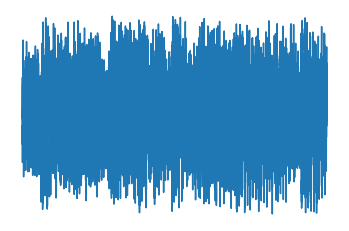

hann window


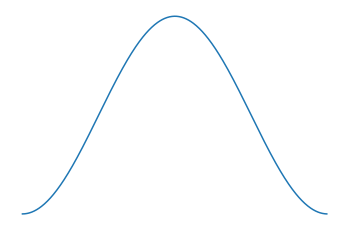

11
フレームごとに切り出す: (512,)


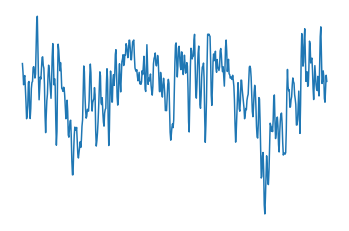

窓関数tanhをかける: (512,)


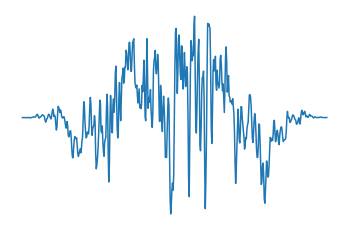

fft後のグラフ shape: (257,)
0Hz -> 11025.0


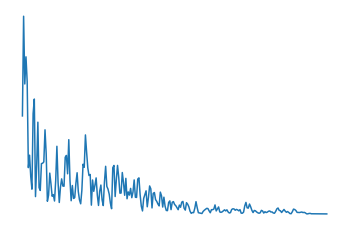

fft後のグラフ shape: (224,)
0Hz -> 9603.80859375


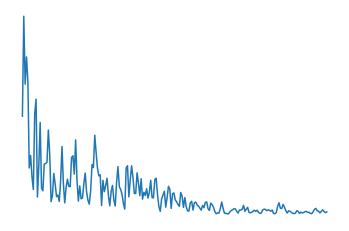

fft後のグラフ shape: (150,)
0Hz -> 6416.89453125


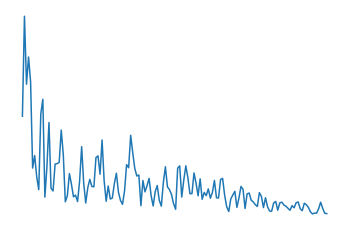

fft後のグラフ shape: (102,)
0Hz -> 4349.70703125


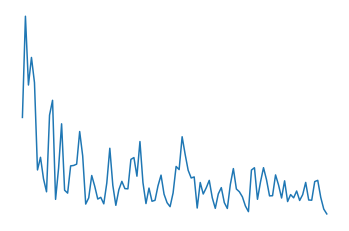

12
フレームごとに切り出す: (512,)


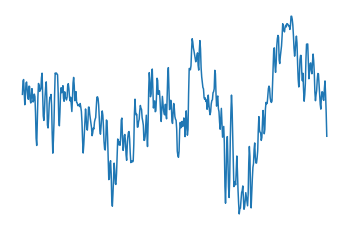

窓関数tanhをかける: (512,)


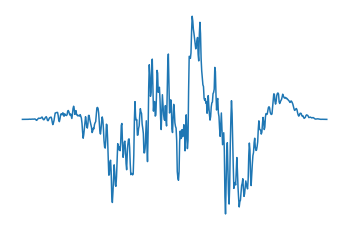

fft後のグラフ shape: (257,)
0Hz -> 11025.0


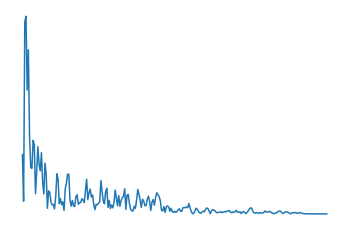

fft後のグラフ shape: (224,)
0Hz -> 9603.80859375


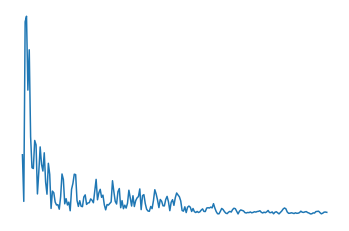

fft後のグラフ shape: (150,)
0Hz -> 6416.89453125


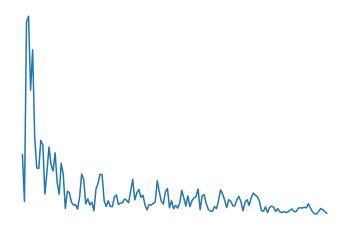

fft後のグラフ shape: (102,)
0Hz -> 4349.70703125


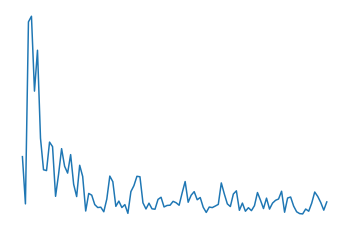

13
フレームごとに切り出す: (512,)


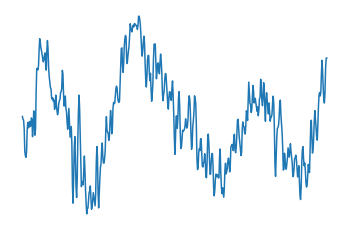

窓関数tanhをかける: (512,)


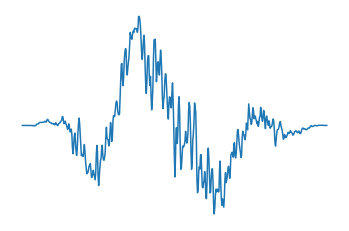

fft後のグラフ shape: (257,)
0Hz -> 11025.0


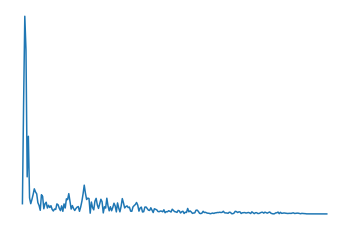

fft後のグラフ shape: (224,)
0Hz -> 9603.80859375


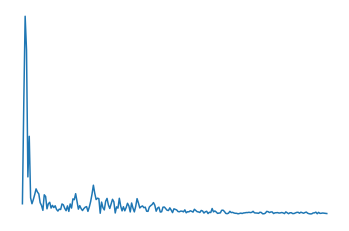

fft後のグラフ shape: (150,)
0Hz -> 6416.89453125


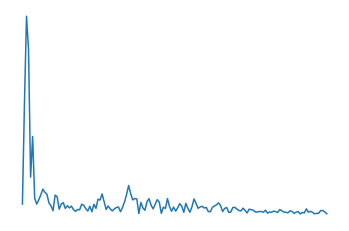

fft後のグラフ shape: (102,)
0Hz -> 4349.70703125


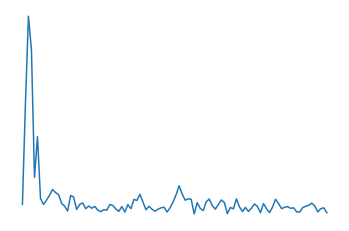

14
フレームごとに切り出す: (512,)


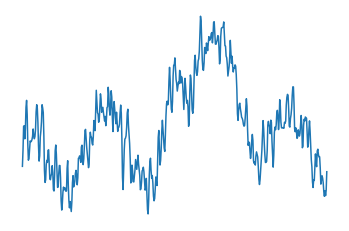

窓関数tanhをかける: (512,)


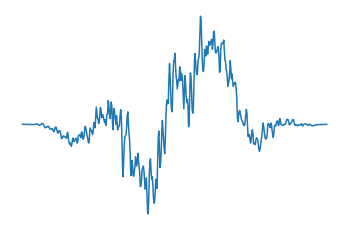

fft後のグラフ shape: (257,)
0Hz -> 11025.0


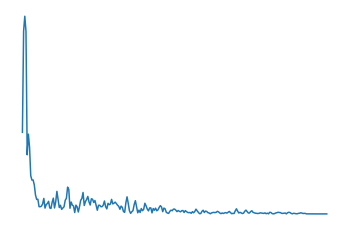

fft後のグラフ shape: (224,)
0Hz -> 9603.80859375


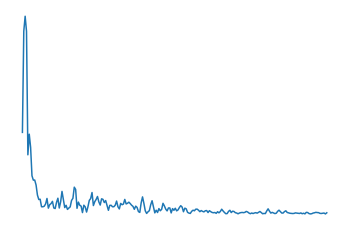

fft後のグラフ shape: (150,)
0Hz -> 6416.89453125


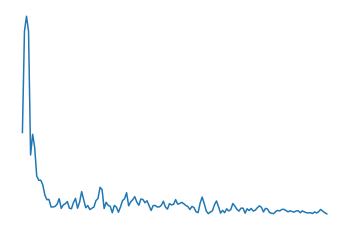

fft後のグラフ shape: (102,)
0Hz -> 4349.70703125


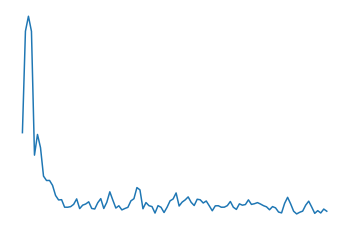

15
フレームごとに切り出す: (512,)


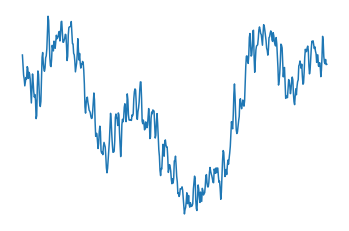

窓関数tanhをかける: (512,)


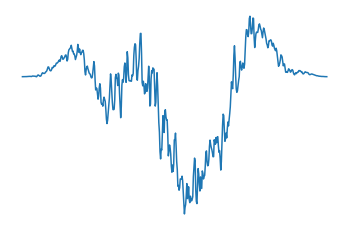

fft後のグラフ shape: (257,)
0Hz -> 11025.0


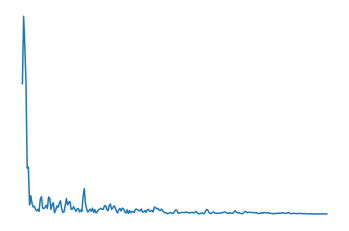

fft後のグラフ shape: (224,)
0Hz -> 9603.80859375


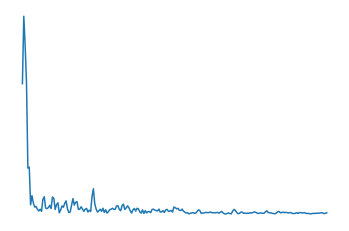

fft後のグラフ shape: (150,)
0Hz -> 6416.89453125


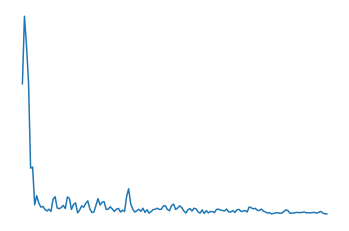

fft後のグラフ shape: (102,)
0Hz -> 4349.70703125


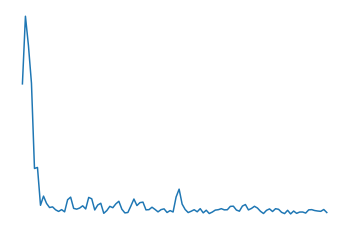

In [23]:
if __name__ == '__main__':
  y, sr = librosa.load(path)
  print("加工前の波形")
  plt.axis('off')
  plt.plot(y)
  plt.show()
  s = stft(y)

# PICTURE

In [13]:
def to_db(x, dBref=2e-5):
    return np.log10(x)

def min_max(x, axis=None): # do min_max normalization ?->https://atmarkit.itmedia.co.jp/ait/articles/2110/07/news027.html
    min = 0
    max = 154.28702 
    # max = 137.74599
    x = np.abs(x)
    result = (x-min)/(max-min)
    return result

def audio_stft(filepath,n_fft = 512,hop_length = 256):
  try:
    y, sr = librosa.load(filepath)
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length)) # オーバラップ率　0％
    stft = min_max(stft)
    stft = to_db(stft)
    # print((stft*255).shape) # -> (257, 173)
    print("Done.")
    return stft
  except Exception:
    return


def audio_stft_not_db(filepath,n_fft = 512,hop_length = 256):
  try:
    y, sr = librosa.load(filepath)
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length)) # オーバラップ率　0％
    stft = min_max(stft)
    # print((stft*255).shape) # -> (257, 173)
    return stft
  except Exception:
    return

Done.


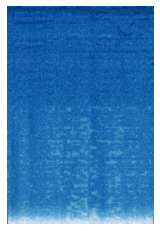

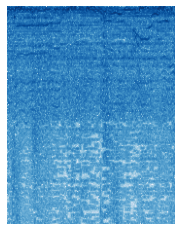

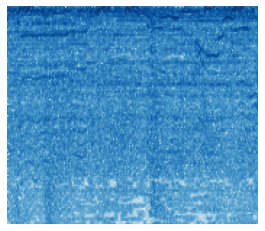

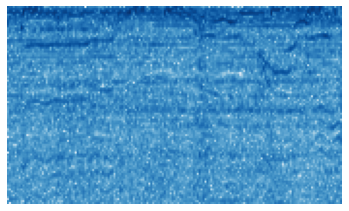

-0.32983708
-9.026411


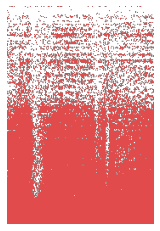

In [51]:
import glob
pathlist = glob.glob("/content/drive/MyDrive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s/Q1/*")
pathlist += glob.glob("/content/drive/MyDrive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s/Q2/*")
pathlist += glob.glob("/content/drive/MyDrive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s/Q3/*")
pathlist += glob.glob("/content/drive/MyDrive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s/Q4/*")

path = pathlist[3]

p = audio_stft(path)
ccode = "Blues"
plt.axis('off')
plt.imshow(p, cmap=ccode)
plt.show()
plt.axis('off')
plt.imshow(p[:224,:], cmap=ccode)
plt.show()
plt.axis('off')
plt.imshow(p[:150,:], cmap=ccode)
plt.show()
plt.axis('off')
plt.imshow(p[:102,:], cmap=ccode)
plt.show()

print(p.max())
print(p.min())

tmppic = []
ashred = [225,75,75,255]
th = 0.1


for k in range(len(pathlist)): 
  cnt = 0
  path = pathlist[k]
  pr = audio_stft_not_db(path)
  for i in range(len(p)):
    tmp = []
    for j in range(len(p[0])):
      if pr[i][j] < 0.01:
        tmp.append(ashred)
        cnt += 1
      else :
        bright = [0,0,0,0]
        tmp.append(bright)
    tmppic.append(tmp)
  if cnt < 257 * 200:
    break
plt.axis('off')
plt.imshow(tmppic)
plt.show()